# Week 2. Digit classification
Cognitive Systems for Health Technology Applications<br>
Juha Kopu & Sakari Lukkarinen, 24.1.2018<br>
Helsinki Metropolia University of Applied Sciences<br>

Based on Chollet's book and material: [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python)

In [1]:
#Download the data

from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


In [2]:
#Preprocess the data

train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255

from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [3]:
val_images = train_images[:10000]
val_labels = train_labels[:10000]
partial_train_images = train_images[10000:]
partial_train_labels = train_labels[10000:]

In [4]:
#Build and compile the model

from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(256, activation = 'relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation = 'softmax'))

network.compile(optimizer = 'rmsprop',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

In [5]:
#Train the model

history = network.fit(partial_train_images, partial_train_labels, 
                      epochs = 10, batch_size = 128, verbose=0,
                       validation_data = (val_images, val_labels))

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


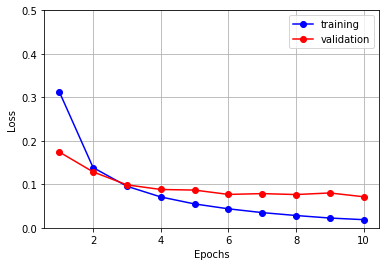

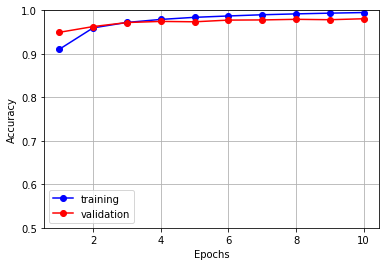

In [15]:
print(history.history.keys())

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

time = range(1, len(loss)+1)

import matplotlib.pyplot as plt

plt.plot(time, loss, 'bo-', label = 'training')
plt.plot(time, val_loss, 'ro-', label = 'validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0, 0.5])
plt.grid()
plt.legend()
plt.show()

plt.plot(time, acc, 'bo-', label = 'training')
plt.plot(time, val_acc, 'ro-', label = 'validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.0])
plt.grid()
plt.legend()
plt.show()


In [7]:
network = models.Sequential()
network.add(layers.Dense(256, activation = 'relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation = 'softmax'))

network.compile(optimizer = 'rmsprop',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

network.fit(train_images, train_labels, 
                      epochs = 7, batch_size = 128)

Epoch 1/7
60000/60000 [==============================] - 6s - loss: 0.2944 - acc: 0.9159     
Epoch 2/7
60000/60000 [==============================] - 6s - loss: 0.1307 - acc: 0.9617     
Epoch 3/7
60000/60000 [==============================] - 5s - loss: 0.0892 - acc: 0.9735     
Epoch 4/7
60000/60000 [==============================] - 5s - loss: 0.0664 - acc: 0.9802     
Epoch 5/7
60000/60000 [==============================] - 5s - loss: 0.0527 - acc: 0.9842     
Epoch 6/7
60000/60000 [==============================] - 5s - loss: 0.0418 - acc: 0.9874     
Epoch 7/7
60000/60000 [==============================] - 4s - loss: 0.0338 - acc: 0.9898     


In [16]:
#Test the model

test_loss, test_acc = network.evaluate(test_images, test_labels)
print('\n')
print('test acc:', test_acc)

 9824/10000 [============================>.] - ETA: 0s

test acc: 0.9792
